# Assignment 3: Regression and Regularization


1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

- You may need to clean and transform the data, including feature engineering, creating dummy variables, or using           dimensionality reduction.
- Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.
2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [188]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [189]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Assignment_3(Linear%20Regression)/kc_house_data.csv")

In [190]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [192]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [193]:
# convert to datetime
df['date'] = pd.to_datetime(df['date'])

# Count the values with .5 in 'bathrooms' column
bathrooms_count = df[df['bathrooms'] % 1 == 0.5].shape[0]

# Count the values with .5 in 'floors' column
floors_count = df[df['floors'] % 1 == 0.5].shape[0]

# Print the counts
print("Count of values with .5 in 'bathrooms':", bathrooms_count)
print("Count of values with .5 in 'floors':", floors_count)

Count of values with .5 in 'bathrooms': 7674
Count of values with .5 in 'floors': 2079


The count provided above indicates a considerable quantity of bathrooms and floors with a decimal value of 0.5. Therefore, I will maintain these values without making any changes.

---------------------------------------------------------  Analysis at the individual data point level.  -----------------------------------------------------

1. Price

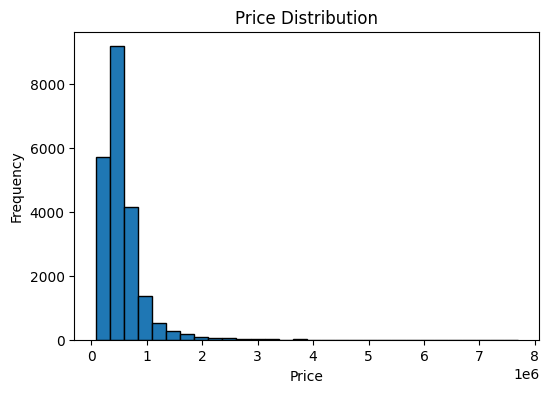

In [194]:
# Plotting the histogram of the price column
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [195]:
print("Mean:",df['price'].mean(),"$")
print("Median:",df['price'].median(),"$")
print("Max:",df['price'].max(),"$")
print("Min:",df['price'].min(),"$")

Mean: 540088.1417665294 $
Median: 450000.0 $
Max: 7700000.0 $
Min: 75000.0 $


In [196]:
df[(df['price'] >= 4000000)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2626,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4149,6447300265,2014-10-14,4000000.0,4,5.50,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8638,3835500195,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [197]:
# df = df.drop(df[df['price'] >= 4000000].index)

It is evident that the price data displays significant skewness and a high degree of kurtosis.

2. Bathroom

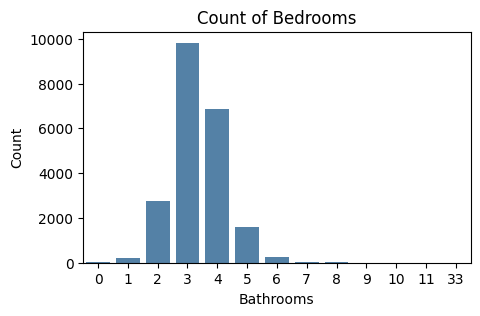

In [198]:
bedroom_counts = df['bedrooms'].value_counts()
plt.figure(figsize=(5, 3))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, color='steelblue')
plt.title('Count of Bedrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

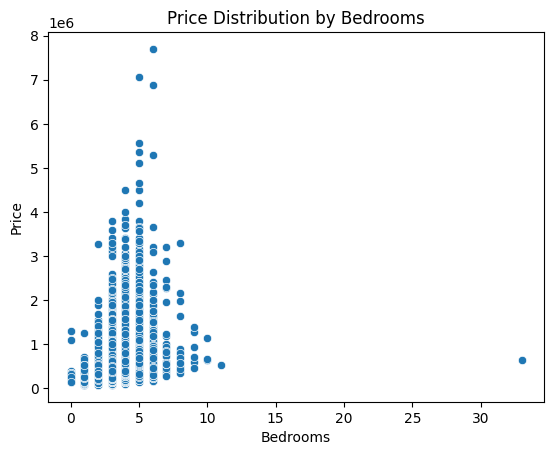

In [199]:
sns.scatterplot(data = df,x='bedrooms', y='price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')
plt.show()

In [200]:
df[(df['bedrooms'] >= 10)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [201]:
df_copy= df[(df['zipcode'] == 98103)]
df_copy.groupby('zipcode')[['bedrooms','price', 'sqft_living','grade']].median()

,bedrooms,price,sqft_living,grade
zipcode,,,,
98103,3.0,550000.0,1505.0,7.0


In [202]:
df = df.drop(df[df['bedrooms'] == 33].index)

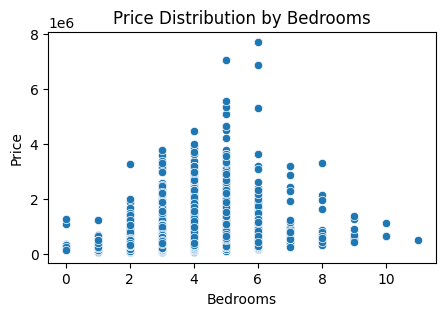

In [203]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data = df,x='bedrooms', y='price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')
plt.show()

In this particular area, houses usually have three bedrooms. Interestingly, there doesn't appear to be a significant price difference between properties with 33 bedrooms and other houses in the same area. Additionally, the median square footage of living space in this area is very close to the square footage of living space in this specific house. This observation raises the possibility of a data entry error. Consequently, we decided to exclude this data point and proceeded to visualize the relationship between price and the number of bathrooms.

3. Bathrooms

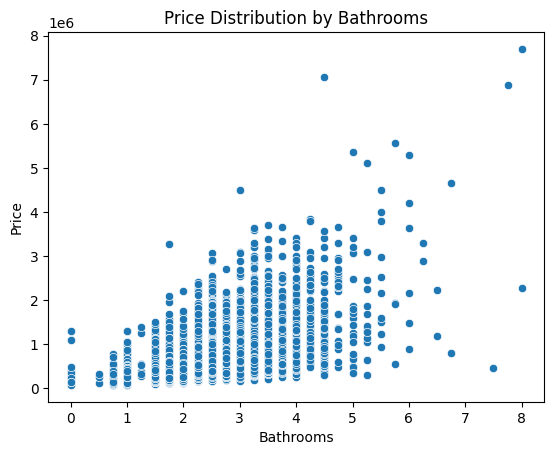

In [204]:
sns.scatterplot(data = df,x='bathrooms', y='price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')
plt.show()

In [205]:
#df[(df['bathrooms'] >= 7)]

In [206]:
df[(df['bathrooms'] == 0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [207]:
df = df.drop(df[df['bathrooms'] == 0].index)
#df = df.drop(df[df['bathrooms'] >= 7].index)

I excluded houses from the analysis that had zero bathrooms or more than seven bathrooms.

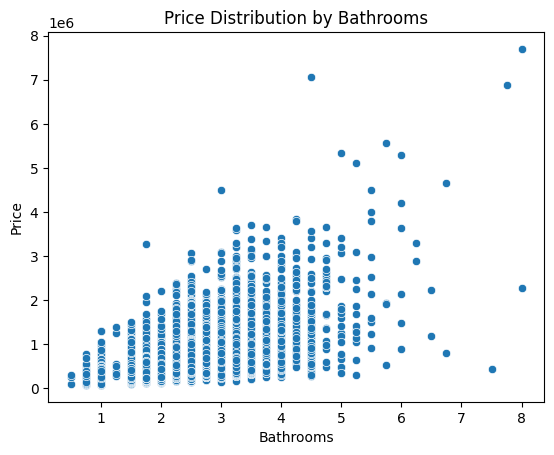

In [208]:
sns.scatterplot(data = df,x='bathrooms', y='price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')
plt.show()

Let's create visual representations that illustrate the relationship between the remaining columns and the price variable.

In [209]:
def plot_scatter(df, column, ax):
    ax.scatter(df[column], df['price'])
    ax.set_title(f"Scatter Plot: price vs {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Price")

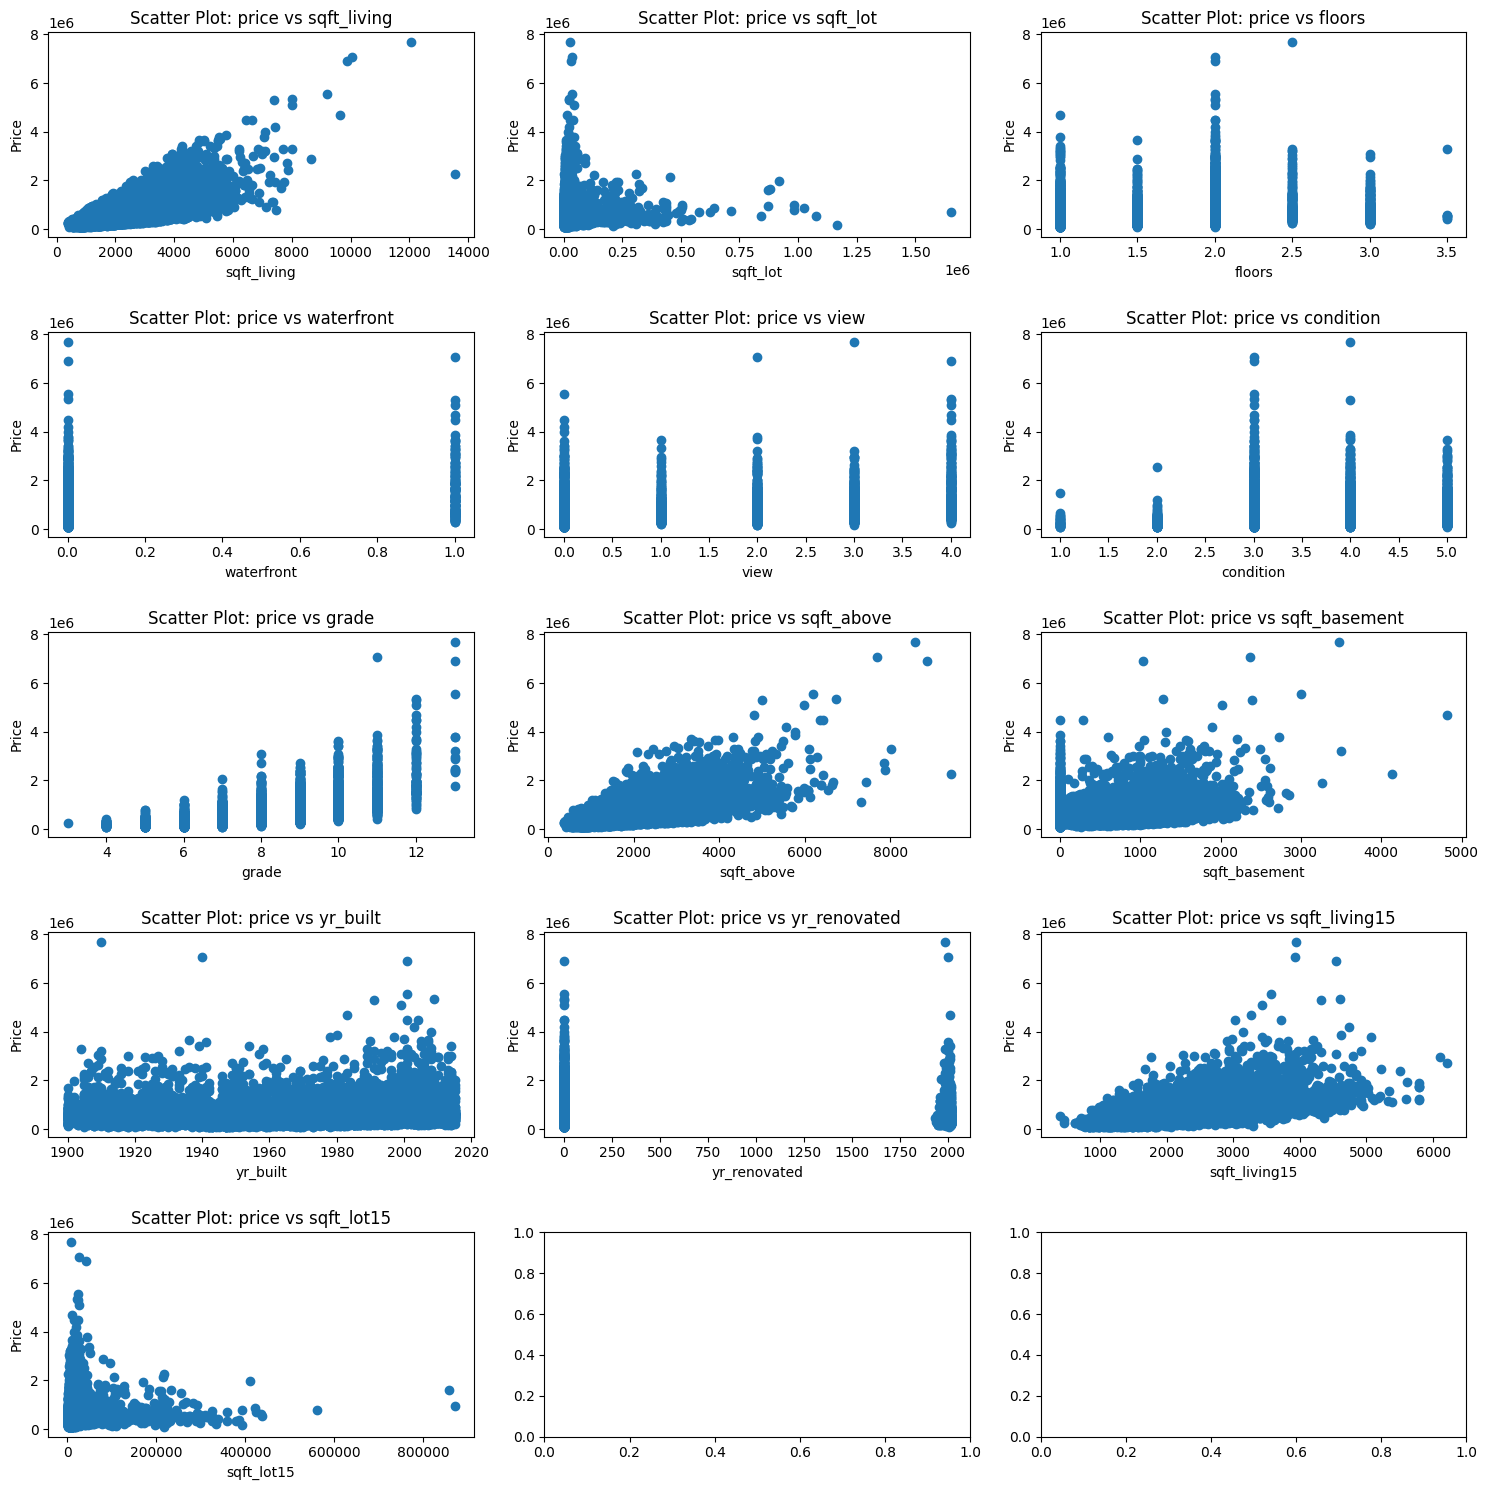

In [210]:
columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']
num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    plot_scatter(df, column, axs[row, col])
plt.tight_layout()
plt.show()

<Figure size 200x100 with 0 Axes>

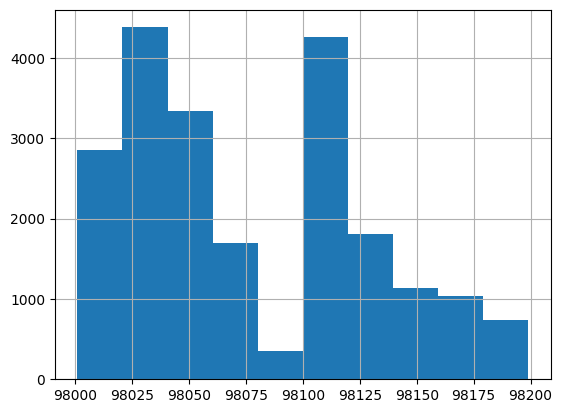

<Figure size 200x100 with 0 Axes>

In [211]:
df["zipcode"].hist()
plt.figure(figsize=(2,1))

<Axes: xlabel='lat', ylabel='long'>

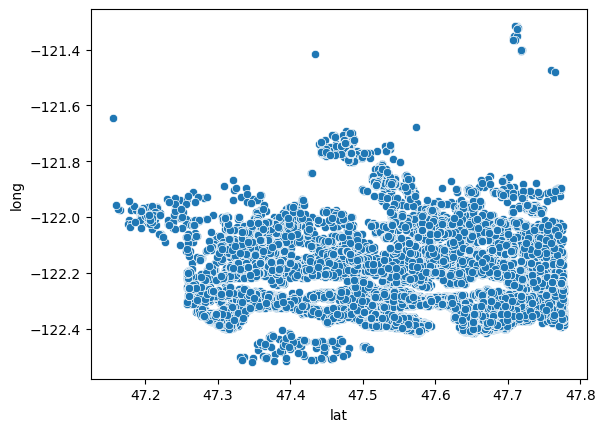

In [212]:
sns.scatterplot(data = df, x = "lat", y = "long")

The overall data appears to follow a normal distribution. To remove outliers from specific columns, we can utilize the z-score method.

In [213]:
#'bedrooms', 'bathrooms', 
def remove_outliers(df):
    variables = ['price','sqft_living', 'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [214]:
# Apply function to df
df = remove_outliers(df)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19890 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19890 non-null  int64         
 1   date           19890 non-null  datetime64[ns]
 2   price          19890 non-null  float64       
 3   bedrooms       19890 non-null  int64         
 4   bathrooms      19890 non-null  float64       
 5   sqft_living    19890 non-null  int64         
 6   sqft_lot       19890 non-null  int64         
 7   floors         19890 non-null  float64       
 8   waterfront     19890 non-null  int64         
 9   view           19890 non-null  int64         
 10  condition      19890 non-null  int64         
 11  grade          19890 non-null  int64         
 12  sqft_above     19890 non-null  int64         
 13  sqft_basement  19890 non-null  int64         
 14  yr_built       19890 non-null  int64         
 15  yr_renovated   19890 non

In [229]:
((21608-19890)/21608)*100

7.950758978156239

Approximately 8 percent of the data was lost during the process.

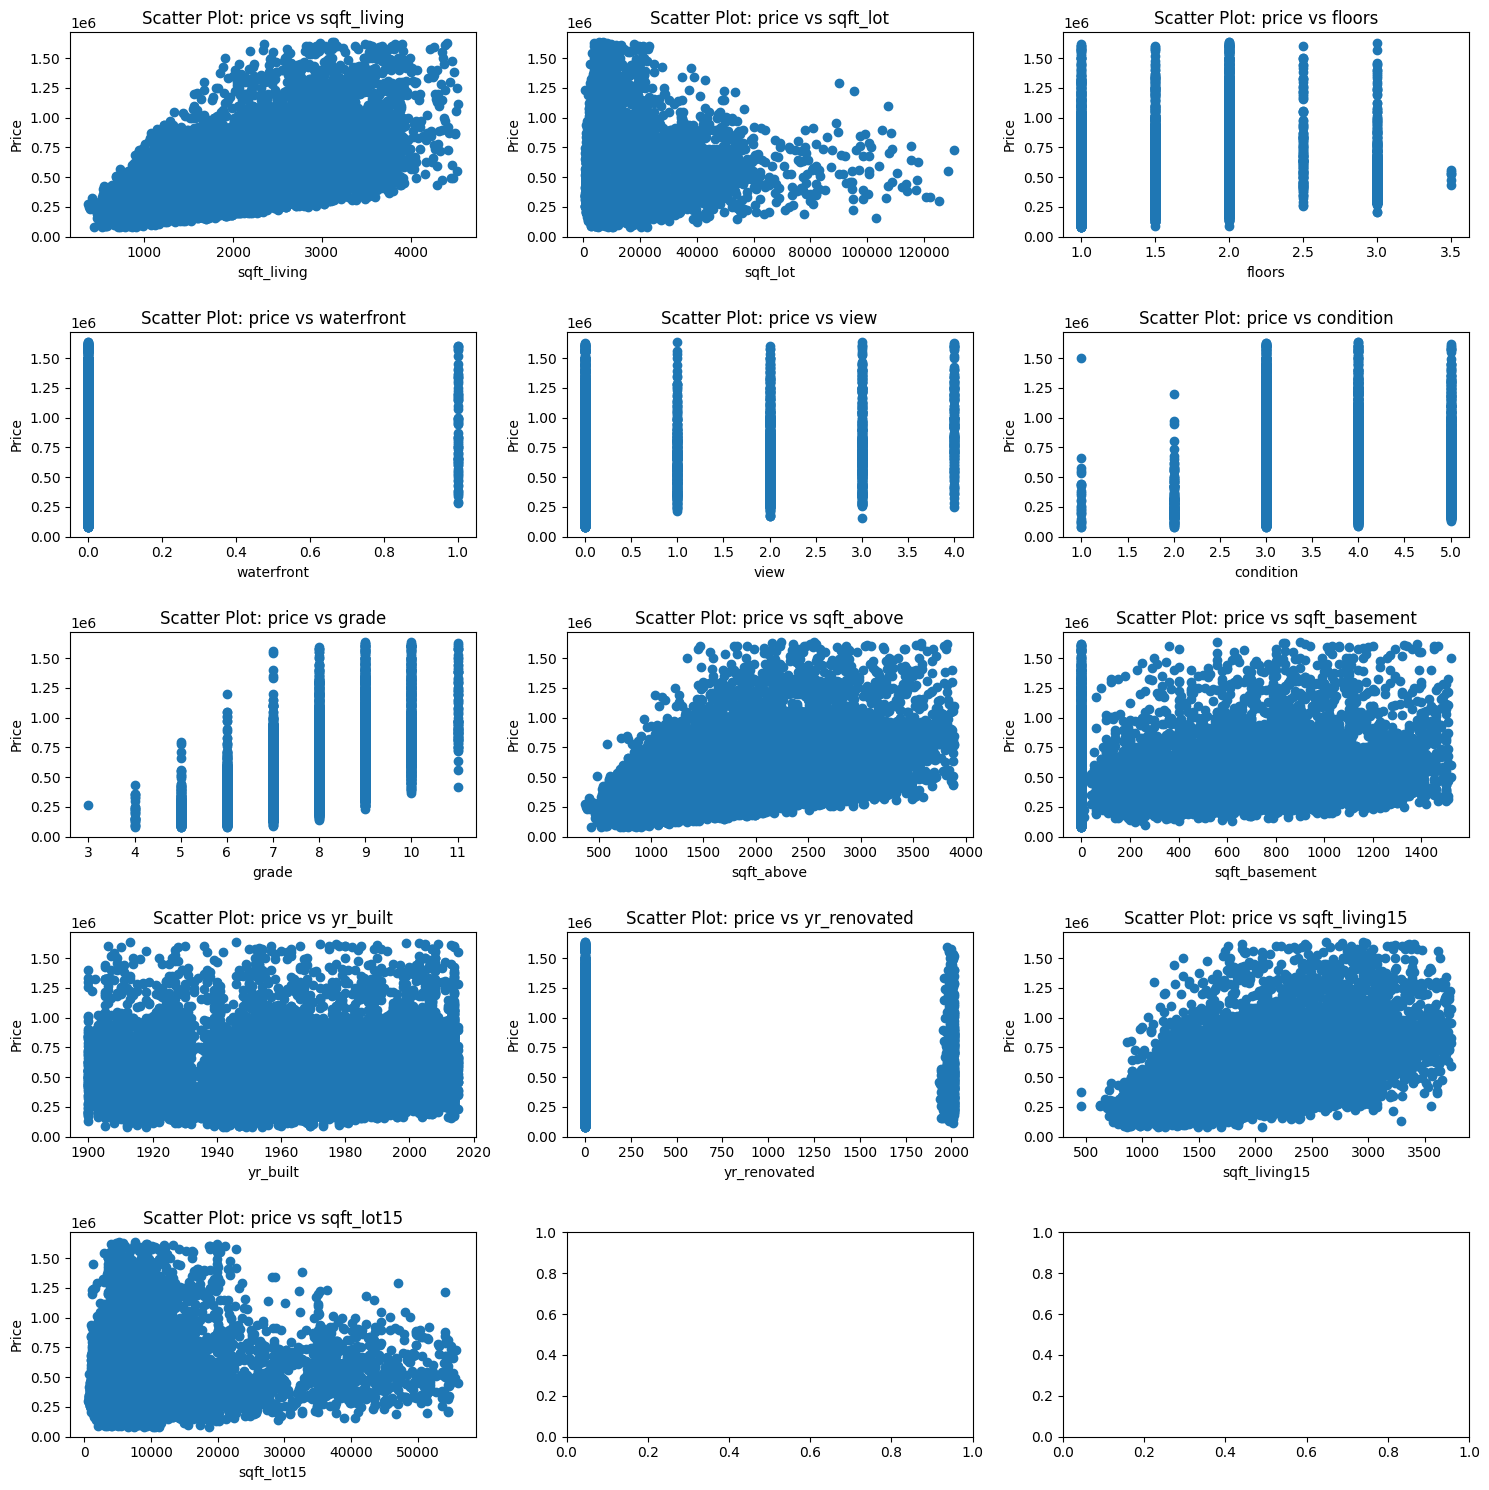

In [217]:
columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']

num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    plot_scatter(df, column, axs[row, col])

plt.tight_layout()

plt.show()

After the removal of certain data points, the distribution of the remaining data appears to be more balanced and evenly distributed.

Let's create few new Variables.

In [218]:
#df['price_per_sqft'] = df.groupby('zipcode')['price'].transform(lambda x: x / df['sqft_living'])
df['month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df['house_age'] = (df['Year'] - df['yr_built'])

In [219]:
df[(df['house_age'] < 0) &(df['price'] >150000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,Year,house_age
1763,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,...,2015,0,98040,47.5784,-122.226,2230,10000,6,2014,-1
2687,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,...,2015,0,98144,47.5756,-122.316,1440,4800,10,2014,-1
7526,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,...,2015,0,98072,47.7685,-122.160,2520,6126,12,2014,-1
8039,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,...,2015,0,98144,47.6001,-122.298,1320,1852,6,2014,-1
14489,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,...,2015,0,98199,47.6514,-122.385,1570,6000,8,2014,-1
17098,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,...,2015,0,98122,47.6074,-122.305,1480,3600,6,2014,-1
19805,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0,0,...,2015,0,98122,47.6047,-122.305,1380,1495,8,2014,-1
20770,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0,0,...,2015,0,98133,47.7384,-122.348,1970,18110,8,2014,-1
20852,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0,0,...,2015,0,98103,47.6725,-122.330,1800,4560,7,2014,-1
20963,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0,0,...,2015,0,98144,47.5951,-122.301,1350,3000,7,2014,-1


The table above indicates that a significant number of high-priced houses were sold prior to their construction. This observation aligns with expectations and is not surprising.

In [220]:
def grade_cat(x):
    if x <= 3:
        return 1
    elif x >= 4 and x <=6:
        return 2
    elif x >= 7 and x < 10:
        return 3
    elif x >= 10:
        return 4
    else:
        return 'Missing'

In [221]:
df['grade_category'] = df['grade'].apply(grade_cat)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19890 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              19890 non-null  int64         
 1   date            19890 non-null  datetime64[ns]
 2   price           19890 non-null  float64       
 3   bedrooms        19890 non-null  int64         
 4   bathrooms       19890 non-null  float64       
 5   sqft_living     19890 non-null  int64         
 6   sqft_lot        19890 non-null  int64         
 7   floors          19890 non-null  float64       
 8   waterfront      19890 non-null  int64         
 9   view            19890 non-null  int64         
 10  condition       19890 non-null  int64         
 11  grade           19890 non-null  int64         
 12  sqft_above      19890 non-null  int64         
 13  sqft_basement   19890 non-null  int64         
 14  yr_built        19890 non-null  int64         
 15  yr_reno

In [223]:
df.drop(columns=['date','id'], inplace=True)

I have extracted the necessary information from the date column, and as the ID column is not needed for the analysis, it has been dropped from the dataset.

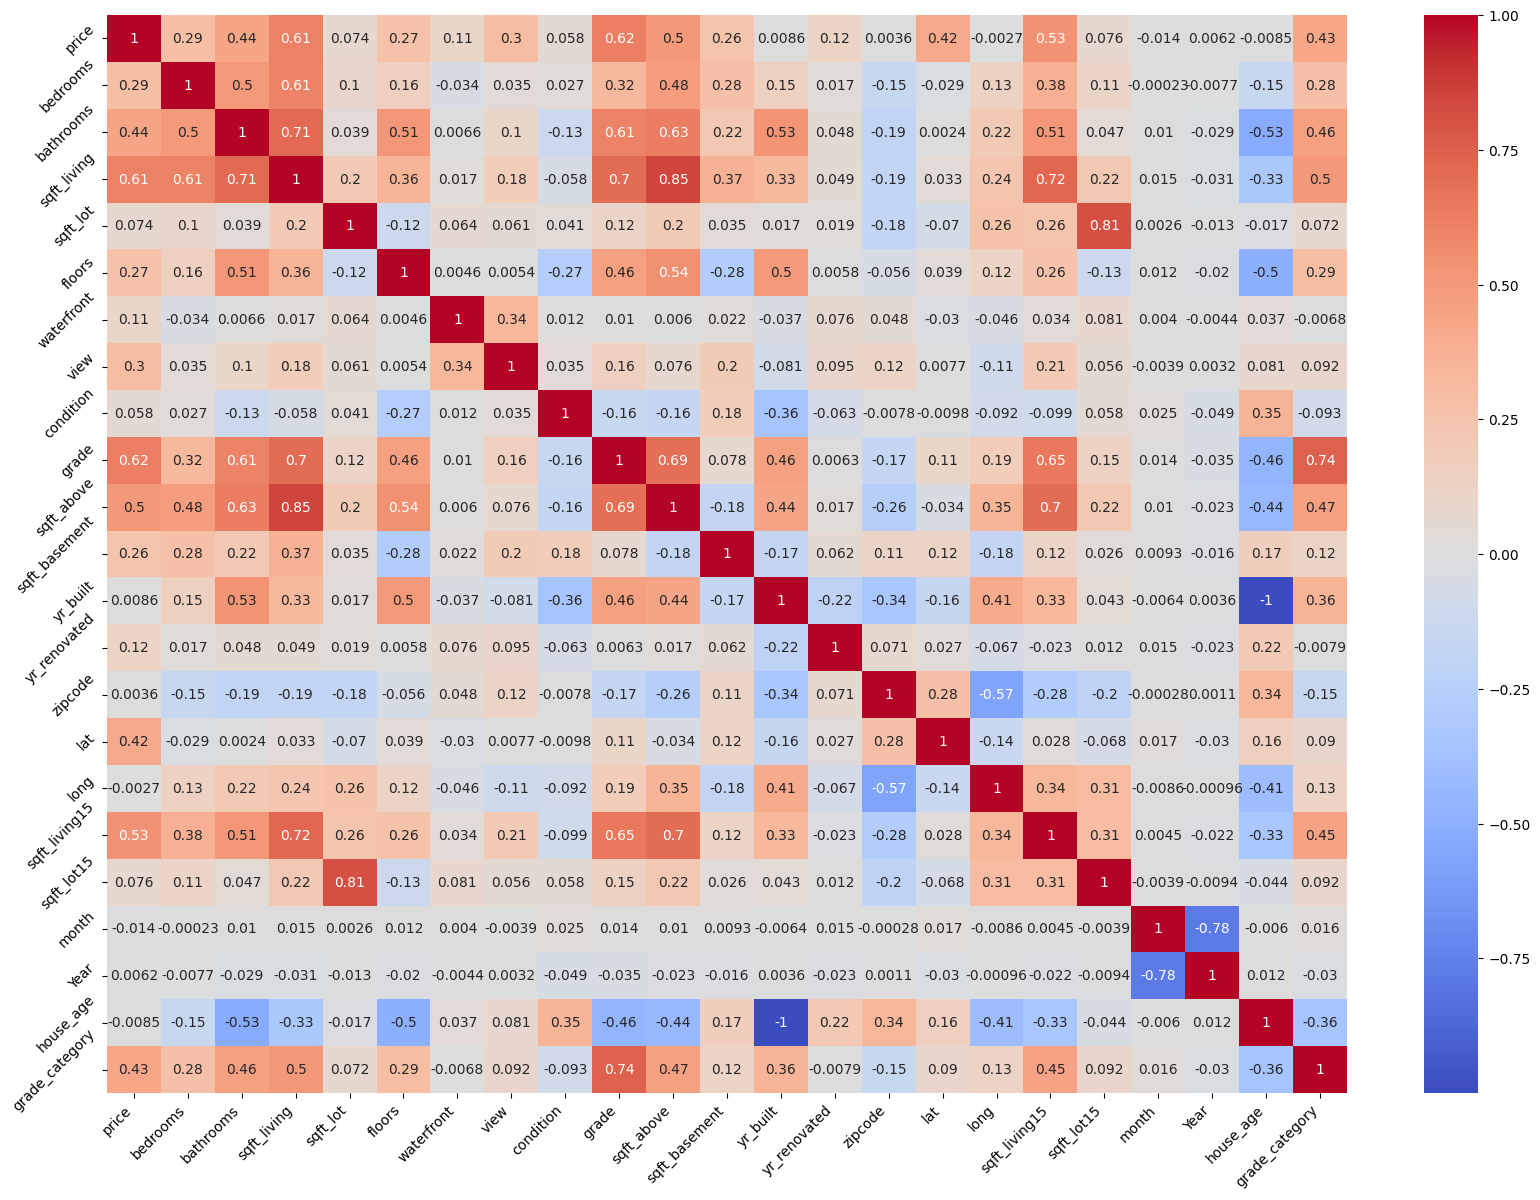

In [224]:
#df_corr= df
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 14))  # Adjust the figsize according to your preference
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x_tick labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')  # Rotate y_tick labels
plt.show()

Still need to analyze this matrix

In [225]:
results = ols("price ~ bedrooms+ bathrooms + sqft_living +floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+Year+house_age+grade_category", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2426.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:52:21   Log-Likelihood:            -2.6302e+05
No. Observations:               19890   AIC:                         5.261e+05
Df Residuals:                   19871   BIC:                         5.262e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.945e+07   4.59e+06    -10.

In [226]:
Y = df.iloc[:, df.columns.get_loc('price')]

X = df.iloc[:, ~((df.columns == 'price') | (df.columns == 'month'))]

In [227]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19890 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        19890 non-null  int64  
 1   bathrooms       19890 non-null  float64
 2   sqft_living     19890 non-null  int64  
 3   sqft_lot        19890 non-null  int64  
 4   floors          19890 non-null  float64
 5   waterfront      19890 non-null  int64  
 6   view            19890 non-null  int64  
 7   condition       19890 non-null  int64  
 8   grade           19890 non-null  int64  
 9   sqft_above      19890 non-null  int64  
 10  sqft_basement   19890 non-null  int64  
 11  yr_built        19890 non-null  int64  
 12  yr_renovated    19890 non-null  int64  
 13  zipcode         19890 non-null  int64  
 14  lat             19890 non-null  float64
 15  long            19890 non-null  float64
 16  sqft_living15   19890 non-null  int64  
 17  sqft_lot15      19890 non-null  int6

In [228]:
y_pred = results.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

NameError: name 'X_test' is not defined